In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df=pd.read_excel(r"C:\Users\basav\Downloads\DecodeX_VoltRide_Dataset.xlsx")

In [3]:
df.head()

,Ride_ID,City,Date,Hour,Pickup_Zone,Drop_Zone,Ride_Distance_km,Estimated_Fare,Surge_Multiplier,EV_Battery_%,Driver_Available,Charging_Station_Nearby,Weather,Ride_Status,Cancellation_By
0,1,Hyderabad,2025-01-01,5,8,3,21.59,374.64,2.0,29,Yes,Yes,Heavy Rain,Completed,NaN
1,2,Mumbai,2025-01-01,13,5,4,4.70,353.66,1.0,61,Yes,No,Rain,Completed,NaN
2,3,Delhi,2025-01-01,11,5,5,3.52,329.88,2.0,30,Yes,Yes,Clear,Completed,NaN
3,4,Bengaluru,2025-01-01,22,9,7,21.28,628.14,2.0,17,Yes,Yes,Clear,Cancelled,System
4,5,Hyderabad,2025-01-01,19,5,2,7.00,526.89,1.5,34,Yes,No,Rain,Completed,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Ride_ID                  2500 non-null   int64         
 1   City                     2500 non-null   object        
 2   Date                     2500 non-null   datetime64[ns]
 3   Hour                     2500 non-null   int64         
 4   Pickup_Zone              2500 non-null   int64         
 5   Drop_Zone                2500 non-null   int64         
 6   Ride_Distance_km         2500 non-null   float64       
 7   Estimated_Fare           2500 non-null   float64       
 8   Surge_Multiplier         2500 non-null   float64       
 9   EV_Battery_%             2500 non-null   int64         
 10  Driver_Available         2500 non-null   object        
 11  Charging_Station_Nearby  2500 non-null   object        
 12  Weather                  2500 non-

In [5]:
df.shape


(2500, 15)

In [6]:
df.nunique()

Ride_ID                    2500
City                          4
Date                        105
Hour                         24
Pickup_Zone                  10
Drop_Zone                    10
Ride_Distance_km           1519
Estimated_Fare             2459
Surge_Multiplier              4
EV_Battery_%                 85
Driver_Available              2
Charging_Station_Nearby       2
Weather                       3
Ride_Status                   2
Cancellation_By               3
dtype: int64

In [7]:
df.isnull().sum()

Ride_ID                       0
City                          0
Date                          0
Hour                          0
Pickup_Zone                   0
Drop_Zone                     0
Ride_Distance_km              0
Estimated_Fare                0
Surge_Multiplier              0
EV_Battery_%                  0
Driver_Available              0
Charging_Station_Nearby       0
Weather                       0
Ride_Status                   0
Cancellation_By            1761
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Cancellation_By'].unique()

array([nan, 'System', 'Driver', 'Rider'], dtype=object)

In [10]:
df['Ride_Status'].unique()

array(['Completed', 'Cancelled'], dtype=object)

In [11]:
df1=df.copy()

In [12]:
df['Ride_status1']=df['Ride_Status'].replace({'Completed':1,'Cancelled':0})

C:\Users\basav\AppData\Local\Temp\ipykernel_25344\622212603.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ride_status1']=df['Ride_Status'].replace({'Completed':1,'Cancelled':0})


In [13]:
df[['Ride_Status' ,'Ride_status1']]

,Ride_Status,Ride_status1
0,Completed,1
1,Completed,1
2,Completed,1
3,Cancelled,0
4,Completed,1
...,...,...
2495,Cancelled,0
2496,Completed,1
2497,Cancelled,0
2498,Cancelled,0


In [14]:
df['EV_Battery_%'].unique()

array([29, 61, 30, 17, 34, 84, 98, 63, 87, 95, 57, 80, 77, 71, 22, 56, 93,
       79, 85, 91, 67, 83, 75, 88, 65, 52, 45, 68, 23, 27, 51, 66, 19, 43,
       99, 33, 89, 18, 40, 60, 41, 70, 90, 42, 78, 74, 48, 16, 69, 81, 53,
       50, 35, 72, 96, 36, 47, 59, 28, 38, 64, 46, 62, 32, 55, 24, 31, 92,
       49, 15, 25, 21, 97, 20, 58, 37, 82, 76, 73, 39, 26, 44, 94, 86, 54])

In [15]:
df['Driver_Availability']=df['Driver_Available'].replace({'Yes':1,'No':0})

C:\Users\basav\AppData\Local\Temp\ipykernel_25344\2668174404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Driver_Availability']=df['Driver_Available'].replace({'Yes':1,'No':0})


In [16]:
df[['Driver_Available','Driver_Availability']]

,Driver_Available,Driver_Availability
0,Yes,1
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1
...,...,...
2495,Yes,1
2496,Yes,1
2497,Yes,1
2498,No,0


In [17]:
df['Charging_Station_Nearby1']=df['Charging_Station_Nearby'].replace({'Yes':1,'No':0})

C:\Users\basav\AppData\Local\Temp\ipykernel_25344\470021256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Charging_Station_Nearby1']=df['Charging_Station_Nearby'].replace({'Yes':1,'No':0})


In [18]:
df[['Charging_Station_Nearby','Charging_Station_Nearby1']]

,Charging_Station_Nearby,Charging_Station_Nearby1
0,Yes,1
1,No,0
2,Yes,1
3,Yes,1
4,No,0
...,...,...
2495,Yes,1
2496,No,0
2497,Yes,1
2498,Yes,1


In [19]:
df['Weather'].unique()

array(['Heavy Rain', 'Rain', 'Clear'], dtype=object)

In [20]:
df.set_index('Ride_ID',inplace=True)

In [21]:
df

,City,Date,Hour,Pickup_Zone,Drop_Zone,Ride_Distance_km,Estimated_Fare,Surge_Multiplier,EV_Battery_%,Driver_Available,Charging_Station_Nearby,Weather,Ride_Status,Cancellation_By,Ride_status1,Driver_Availability,Charging_Station_Nearby1
Ride_ID,,,,,,,,,,,,,,,,,
1,Hyderabad,2025-01-01,5,8,3,21.59,374.64,2.0,29,Yes,Yes,Heavy Rain,Completed,NaN,1,1,1
2,Mumbai,2025-01-01,13,5,4,4.70,353.66,1.0,61,Yes,No,Rain,Completed,NaN,1,1,0
3,Delhi,2025-01-01,11,5,5,3.52,329.88,2.0,30,Yes,Yes,Clear,Completed,NaN,1,1,1
4,Bengaluru,2025-01-01,22,9,7,21.28,628.14,2.0,17,Yes,Yes,Clear,Cancelled,System,0,1,1
5,Hyderabad,2025-01-01,19,5,2,7.00,526.89,1.5,34,Yes,No,Rain,Completed,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,Bengaluru,2025-04-14,22,8,1,19.85,638.10,1.0,33,Yes,Yes,Rain,Cancelled,Driver,0,1,1
2497,Bengaluru,2025-04-15,9,10,4,10.81,643.53,1.0,76,Yes,No,Rain,Completed,NaN,1,1,0
2498,Hyderabad,2025-04-15,2,7,5,5.18,775.76,2.0,77,Yes,Yes,Clear,Cancelled,Driver,0,1,1


In [22]:
df.describe()

,Date,Hour,Pickup_Zone,Drop_Zone,Ride_Distance_km,Estimated_Fare,Surge_Multiplier,EV_Battery_%,Ride_status1,Driver_Availability,Charging_Station_Nearby1
count,2500,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2025-02-21 14:00:57.600000,11.5572,5.466800,5.640400,13.456720,455.819756,1.421600,57.643600,0.704400,0.878000,0.641600
min,2025-01-01 00:00:00,0.0000,1.000000,1.000000,2.010000,120.040000,1.000000,15.000000,0.000000,0.000000,0.000000
25%,2025-01-27 00:00:00,6.0000,3.000000,3.000000,7.700000,273.902500,1.000000,36.000000,0.000000,1.000000,0.000000
50%,2025-02-22 00:00:00,12.0000,5.000000,6.000000,13.455000,456.980000,1.200000,58.000000,1.000000,1.000000,1.000000
75%,2025-03-20 00:00:00,17.0000,8.000000,8.000000,19.300000,630.920000,2.000000,79.000000,1.000000,1.000000,1.000000
max,2025-04-15 00:00:00,23.0000,10.000000,10.000000,24.980000,799.680000,2.000000,99.000000,1.000000,1.000000,1.000000
std,NaN,6.8581,2.883925,2.855862,6.705038,199.649647,0.382298,24.469591,0.456403,0.327351,0.479626


In [23]:
city=df.groupby('City')['Estimated_Fare'].sum().reset_index().sort_values(by='Estimated_Fare')

In [24]:
city.set_index('City',inplace=True)

In [25]:
city

,Estimated_Fare
City,
Hyderabad,279031.68
Delhi,282116.67
Bengaluru,284614.91
Mumbai,293786.13


In [26]:
Total_Ride=df.groupby('City')['Ride_status1'].sum()

In [27]:
Total_Ride

City
Bengaluru    442
Delhi        450
Hyderabad    411
Mumbai       458
Name: Ride_status1, dtype: int64

In [28]:
Avg_km=df.groupby('City')[['Ride_Distance_km','Hour']].mean()

In [29]:
Avg_km

,Ride_Distance_km,Hour
City,,
Bengaluru,13.561157,11.581616
Delhi,13.701630,11.564873
Hyderabad,13.166077,11.360601
Mumbai,13.383699,11.710031


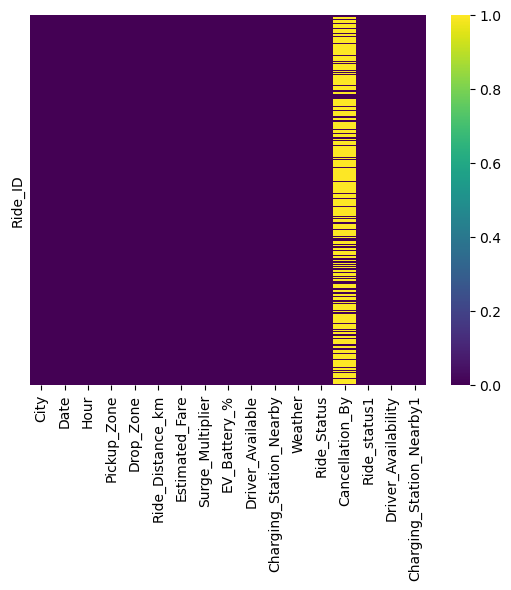

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
plt.show()

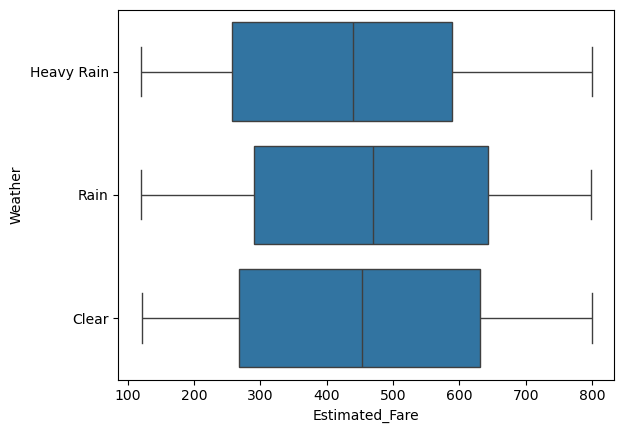

In [31]:
sns.boxplot(x="Estimated_Fare",y="Weather",data=df)
plt.show()

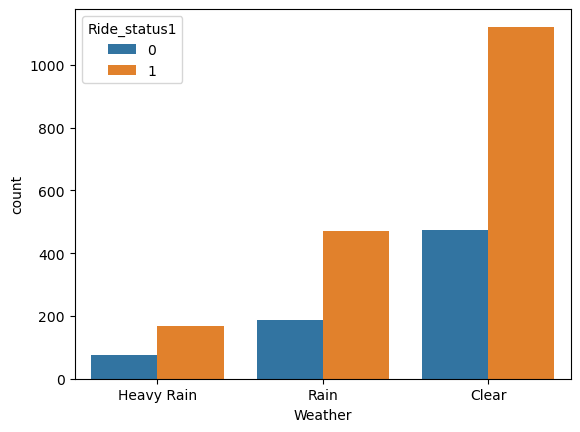

In [32]:
sns.countplot(x="Weather",hue="Ride_status1",data=df)
plt.show()

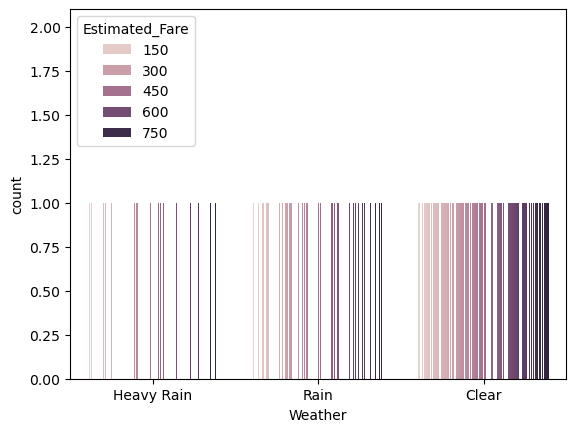

In [33]:
sns.countplot(x="Weather",hue="Estimated_Fare",data=df)
plt.show()

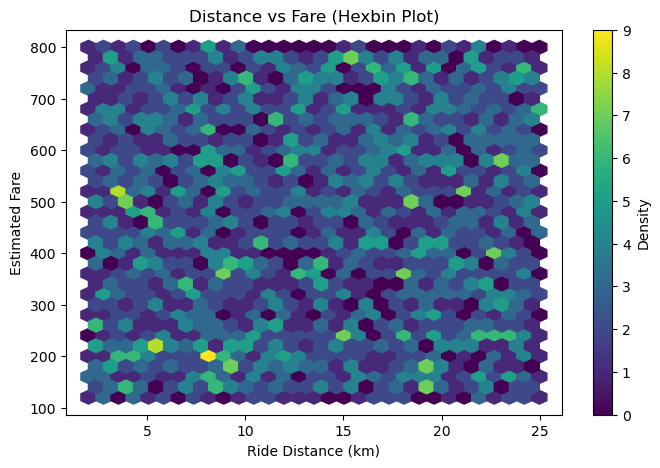

In [34]:
plt.figure(figsize=(8,5))
plt.hexbin(df["Ride_Distance_km"], df["Estimated_Fare"], gridsize=30)
plt.colorbar(label="Density")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Estimated Fare")
plt.title("Distance vs Fare (Hexbin Plot)")
plt.show()

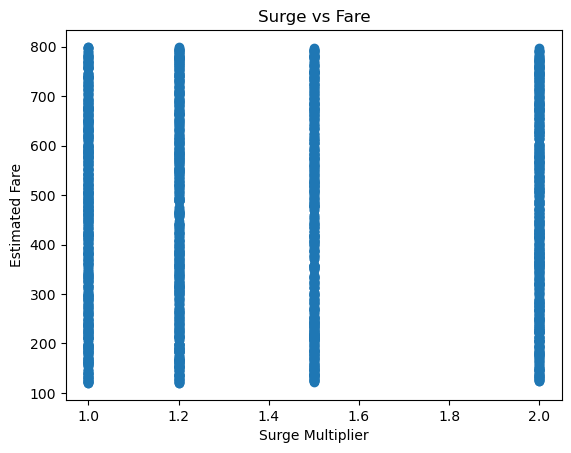

In [35]:
plt.figure()
plt.scatter(df['Surge_Multiplier'], df['Estimated_Fare'])
plt.xlabel("Surge Multiplier")
plt.ylabel("Estimated Fare")
plt.title("Surge vs Fare")
plt.show()


In [36]:
cancellation_rate = df.groupby('Weather')['Ride_Status'].value_counts(normalize=True)
print(cancellation_rate)

Weather     Ride_Status
Clear       Completed      0.703008
            Cancelled      0.296992
Heavy Rain  Completed      0.685714
            Cancelled      0.314286
Rain        Completed      0.714719
            Cancelled      0.285281
Name: proportion, dtype: float64


In [86]:
df.dtypes

City                                object
Date                        datetime64[ns]
Hour                                 int64
Pickup_Zone                          int64
Drop_Zone                            int64
Ride_Distance_km                   float64
Estimated_Fare                     float64
Surge_Multiplier                   float64
EV_Battery_%                         int64
Driver_Available                    object
Charging_Station_Nearby             object
Weather                             object
Ride_Status                         object
Cancellation_By                     object
Ride_status1                         int64
Driver_Availability                  int64
Charging_Station_Nearby1             int64
dtype: object

#Decision Tree on DecodeX_VoltRide_Dataset

In [38]:
target = "Ride_status1"

X = df.drop(target, axis=1)
y = df[target]


In [39]:
X = pd.get_dummies(X, drop_first=True)


In [40]:
X = X.apply(pd.to_numeric, errors="coerce")


In [41]:
X = X.fillna(0)

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
clf = DecisionTreeClassifier(random_state=42)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       368

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


Confusion Matrix:
 [[132   0]
 [  0 368]]


MSE: 40319.16
R2 Score: 0.00


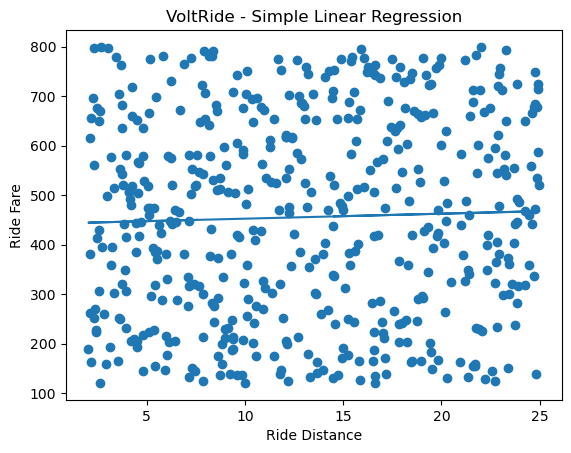

In [46]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load Dataset
#df = pd.read_csv("VoltRide.csv")

# Step 3: Select Independent (X) and Dependent (Y) Variables
X = df[['Ride_Distance_km']]      # Change column name if needed
y = df['Estimated_Fare']            # Change column name if needed

# Step 4: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create Model
model = LinearRegression()

# Step 6: Train Model
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Step 9: Plot Regression Line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Ride Distance")
plt.ylabel("Ride Fare")
plt.title("VoltRide - Simple Linear Regression")
plt.show()